<a href="https://colab.research.google.com/github/samkhushal/DSBDA/blob/practicals/HEartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd



In [3]:
from google.colab import files
df = files.upload()

Saving heart.csv to heart.csv


In [ ]:
from google.colab import files
df = files.upload()

In [91]:
data = pd.read_csv('heart.csv')

In [92]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
data.shape
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [94]:
data.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

#1.  **Data Cleaing**

In [95]:
data.dropna(inplace=True)

In [96]:
data.drop_duplicates(inplace=True)

In [97]:
duplicates = data.duplicated().sum()
print("\nDuplicate rows:", duplicates)


Duplicate rows: 0


In [99]:
missing =data.isnull().sum()
print(missing)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# **2. Data Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler

heart_data['sex'] = heart_data['sex'].map({'male': 0, 'female': 1})


scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[numeric_cols] = scaler.fit_transform(heart_data[numeric_cols])


print(heart_data.head())

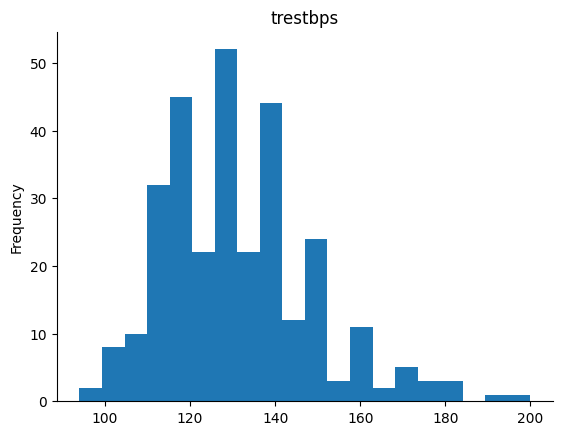

In [98]:
from matplotlib import pyplot as plt
data['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **3. Data modeling**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score


In [101]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [103]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {x_test.shape}")
print(f"y_test {y_test.shape}")


Size of splitted data
x_train (241, 13)
y_train (241,)
y_test (61, 13)
y_test (61,)


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression

X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)






Accuracy: 0.8032786885245902


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1]


In [109]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8032786885245902
